In [19]:
import numpy as np
import os
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import cv2
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
import scipy
from scipy import io
from scipy.io import loadmat
import numpy as np
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize'] = (16.0, 4.0)

In [20]:
categories = ["0", "1", "2", "3", "4", "5", "6","7", "8", "9"]
values = array(categories) #same as above array[]
label_encoder = LabelEncoder()
int_encoded = label_encoder.fit_transform(values) #[0,1,2,3,4,5,6,7,8,9]
onehot_encoder = OneHotEncoder(sparse=True)
int_encoded = int_encoded.reshape(-1,1) #(10,1) matrix 
onehot_encoded = onehot_encoder.fit_transform(int_encoded) 
#print(onehot_encoded)

In [22]:
#Load dataset and segregate labels from images
image_training= io.loadmat('../input/train_32x32.mat 2')
image_testing= io.loadmat('../input/test_32x32.mat 2')
train_image= image_training['X']
train_tag= image_training['y']
test_image= image_testing['X']
test_tag= image_testing['y']

In [23]:
print("Training", train_image.shape, train_tag.shape)

Training (32, 32, 3, 73257) (73257, 1)


In [24]:
#univariate Statistical data
print("Train Mean", np.mean(train_image))
print("Test Mean", np.mean(test_image))
print("Train std-Deviation", np.std(train_image))
print("Test std-Deviation", np.std(test_image))

Train Mean 115.11177966923525
Test Mean 116.78117117073857
Train std-Deviation 50.81926790623289
Test std-Deviation 57.37636659640377


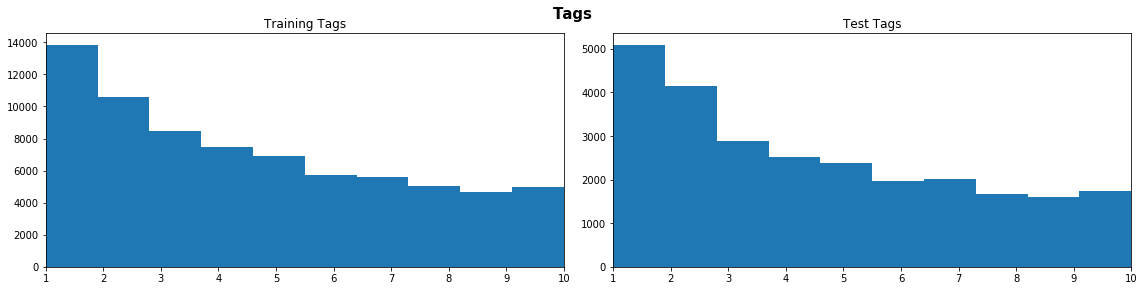

In [25]:
#Plot distribution of tags in training and test

fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True)
fig.suptitle('Tags', fontsize=15, fontweight='bold', y=1)

ax1.hist(train_tag, bins=10)
ax1.set_title("Training Tags")
ax1.set_xlim(1, 10)

ax2.hist(test_tag, bins=10);
ax2.set_title("Test Tags");

fig.tight_layout()

In [26]:
#required format
train_image = np.transpose(train_image, (3, 0, 1, 2))
test_image = np.transpose(test_image, (3, 0, 1, 2))
train_tag = train_tag[:,0]
test_tag= test_tag[:,0]
print("Training", train_image.shape, train_tag.shape)

Training (73257, 32, 32, 3) (73257,)


In [27]:
#check the tags available
print(np.unique(train_tag))

[ 1  2  3  4  5  6  7  8  9 10]


In [28]:
#change tag 10 to 0
train_tag[train_tag == 10] = 0
test_tag[test_tag == 10] = 0
print(np.unique(train_tag))

[0 1 2 3 4 5 6 7 8 9]


In [29]:
#Function for plotting
def plot_images(image, nrows, ncols, tags):
    fig, axes = plt.subplots(nrows, ncols)
    for i, ax in enumerate(axes.flat): 
        if image[i].shape == (32, 32, 3):
            ax.imshow(image[i])
        else:
            ax.imshow(image[i,:,:,0])
        ax.set_xticks([]); ax.set_yticks([])
        ax.set_title(tags[i])

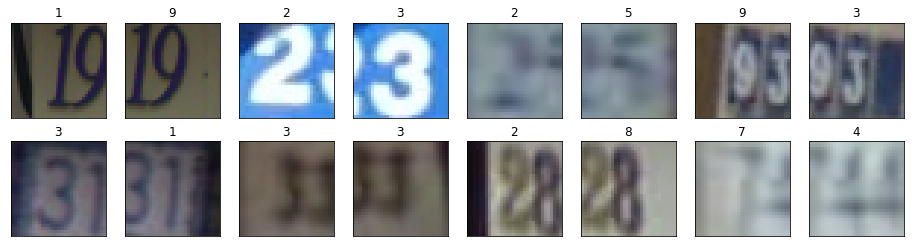

In [30]:
plot_images(train_image, 2, 8, train_tag)

In [31]:
#Images are different in Digit font, color, clarity(blur/clear) etc

In [32]:
print(train_image.shape, train_tag.shape)
print(test_image.shape, test_tag.shape)

(73257, 32, 32, 3) (73257,)
(26032, 32, 32, 3) (26032,)


In [33]:
#We need to split data into test and crossvalidation set

from sklearn.model_selection import train_test_split

test_image,crossvalidation_image,test_tag,crossvalidation_tag= train_test_split(test_image,test_tag,test_size=13016,random_state=106)


In [34]:
print ('Train data:', train_image.shape,', Train Tag:', train_tag.shape)
print ('Test data:', test_image.shape,', Test Tag:', test_tag.shape)
print ('Crossvalidation data:', crossvalidation_image.shape,', Crossvalidation tag:', crossvalidation_tag.shape)

Train data: (73257, 32, 32, 3) , Train Tag: (73257,)
Test data: (13016, 32, 32, 3) , Test Tag: (13016,)
Crossvalidation data: (13016, 32, 32, 3) , Crossvalidation tag: (13016,)


In [35]:
#Training data: 73257
#Test Data: 13016
#CrossValidation/Validation data: 13016

In [36]:
from sklearn.preprocessing import OneHotEncoder
 
# Fit the OneHotEncoder
enc = OneHotEncoder().fit(train_tag.reshape(-1, 1))

# Transform the label values to a one-hot-encoding scheme
train_tag = enc.transform(train_tag.reshape(-1, 1)).toarray()
test_tag = enc.transform(test_tag.reshape(-1, 1)).toarray()
crossvalidation_tag = enc.transform(crossvalidation_tag.reshape(-1, 1)).toarray()

print("Training set", train_tag.shape)
print("Test set", test_tag.shape)
print("Training set", crossvalidation_tag.shape)

Training set (73257, 10)
Test set (13016, 10)
Training set (13016, 10)


In [37]:
def rgb2gray(images):
    greyconvert = np.dot(images, [0.299, 0.587, 0.114]) #reference: https://angeljohnsy.blogspot.com/2011/04/rgb-image-to-grayscale-image.html
    return np.expand_dims(greyconvert, axis=3)

train_greyscale = rgb2gray(train_image).astype(np.float32)
test_greyscale = rgb2gray(test_image).astype(np.float32)
crossvalidation_greyscale = rgb2gray(crossvalidation_image).astype(np.float32)

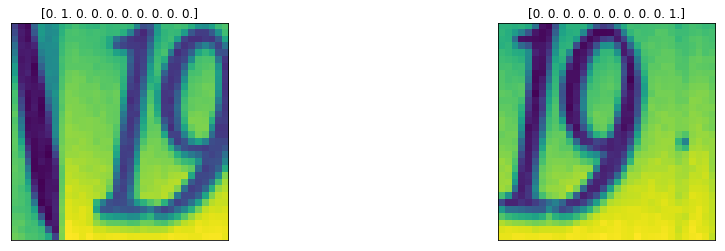

In [38]:
plot_images(train_greyscale, 1, 2, train_tag)

In [39]:
import tensorflow as tf
from keras.layers import BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
import keras
import tempfile
import pandas as pd

num_classes = 10
cnn = Sequential()
cnn.add(Conv2D(32, kernel_size=(6,6),activation='relu',input_shape=(32, 32, 1)))
cnn.add(Dropout(0.2))
cnn.add(BatchNormalization())
cnn.add(Conv2D(32, kernel_size = (6,6), activation = 'relu'))
cnn.add(Dropout(0.2))
cnn.add(Conv2D(32, kernel_size = (6,6), activation = 'relu'))
cnn.add(Dropout(0.2))
cnn.add(BatchNormalization())
cnn.add(MaxPooling2D(pool_size = (2,2)))
cnn.add(Flatten())
cnn.add(Dense(128, activation = 'relu'))
cnn.add(Dense(128, activation = 'relu'))
cnn.add(Dense(num_classes, activation='softmax'))
    
cnn.compile("adam", "categorical_crossentropy", metrics=['accuracy'])

history_cnn = cnn.fit(train_greyscale, train_tag,batch_size=64, epochs=5, verbose=1, validation_split=.1)
scores = cnn.evaluate(crossvalidation_greyscale, crossvalidation_tag, batch_size = 64, verbose = 0)
print("%s: %.2f%%" % (cnn.metrics_names[1], scores[1]*100))

Train on 65931 samples, validate on 7326 samples
Epoch 1/5
65931/65931 [==============================] - 706s 11ms/step - loss: 0.6982 - acc: 0.7813 - val_loss: 0.6211 - val_acc: 0.8004
Epoch 2/5
65931/65931 [==============================] - 731s 11ms/step - loss: 0.3770 - acc: 0.8859 - val_loss: 0.3895 - val_acc: 0.8830
Epoch 3/5
65931/65931 [==============================] - 785s 12ms/step - loss: 0.3081 - acc: 0.9068 - val_loss: 0.3283 - val_acc: 0.8986
Epoch 4/5
65931/65931 [==============================] - 786s 12ms/step - loss: 0.2645 - acc: 0.9201 - val_loss: 0.3179 - val_acc: 0.9066
Epoch 5/5
65931/65931 [==============================] - 764s 12ms/step - loss: 0.2331 - acc: 0.9293 - val_loss: 0.3361 - val_acc: 0.9019
acc: 88.80%


In [40]:
num_classes = 10
cnn = Sequential()
cnn.add(Conv2D(32, kernel_size=(6,6),activation='relu',input_shape=(32, 32, 1)))
cnn.add(Dropout(0.2))
cnn.add(BatchNormalization())
cnn.add(Conv2D(32, kernel_size = (6,6), activation = 'relu'))
cnn.add(Dropout(0.2))
cnn.add(Conv2D(32, kernel_size = (6,6), activation = 'relu'))
cnn.add(Dropout(0.2))
cnn.add(BatchNormalization())
cnn.add(MaxPooling2D(pool_size = (2,2)))
cnn.add(Flatten())
cnn.add(Dense(128, activation = 'relu'))
cnn.add(Dense(128, activation = 'relu'))
cnn.add(Dense(num_classes, activation='softmax'))
    
cnn.compile("adam", "categorical_crossentropy", metrics=['accuracy'])

history_cnn = cnn.fit(train_greyscale, train_tag,batch_size=64, epochs=5, verbose=1, validation_split=.1)
scores = cnn.evaluate(test_greyscale, test_tag, batch_size = 64, verbose = 0)
print("%s: %.2f%%" % (cnn.metrics_names[1], scores[1]*100))

Train on 65931 samples, validate on 7326 samples
Epoch 1/5
65931/65931 [==============================] - 752s 11ms/step - loss: 0.6849 - acc: 0.7870 - val_loss: 0.6189 - val_acc: 0.8055
Epoch 2/5
65931/65931 [==============================] - 796s 12ms/step - loss: 0.3805 - acc: 0.8842 - val_loss: 0.3636 - val_acc: 0.8934
Epoch 3/5
65931/65931 [==============================] - 791s 12ms/step - loss: 0.3116 - acc: 0.9066 - val_loss: 0.3347 - val_acc: 0.9021
Epoch 4/5
65931/65931 [==============================] - 792s 12ms/step - loss: 0.2692 - acc: 0.9191 - val_loss: 0.3595 - val_acc: 0.8919
Epoch 5/5
65931/65931 [==============================] - 810s 12ms/step - loss: 0.2324 - acc: 0.9304 - val_loss: 0.3255 - val_acc: 0.9058
acc: 89.62%
